In [18]:
# aivietnam.ai - advertising
import numpy as np
# from numpy import genfromtxt
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line
%matplotlib inline

def load_data_from_file(fileName = "advertising.csv"):
  data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]

  ones_column = np.ones((features_X.shape[0], 1))   
  features_X = np.hstack((features_X, ones_column))

  return features_X, sales_Y


In [19]:
#Question 2
features_X, _ = load_data_from_file()
print(features_X[:5,:])

[[230.1  37.8  69.2   1. ]
 [ 44.5  39.3  45.1   1. ]
 [ 17.2  45.9  69.3   1. ]
 [151.5  41.3  58.5   1. ]
 [180.8  10.8  58.4   1. ]]


In [20]:
#Question 3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


In [21]:
def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound

def create_individual(n=4, bound=10):

    individual = [random.uniform(-bound/2, bound/2) for _ in range(n)]

    return individual

In [22]:
individual = create_individual()
print(individual)

[3.4442185152504816, 2.5795440294030243, -0.79428419169155, -2.4108324970703663]


In [27]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):

    loss = compute_loss(individual)
    
    fitness = 1 / (loss + 1)

    return fitness

In [28]:
#question 4
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.2938328947793636e-06


In [29]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    for i in range(len(individual1)):
        if random.random() < crossover_rate:         
            individual1_new[i], individual2_new[i] = individual2_new[i], individual1_new[i]

    return individual1_new, individual2_new

In [30]:
#question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


In [31]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()

    for i in range(len(individual_m)):
        if random.random() < mutation_rate:            
            individual_m[i] = random.uniform(-10, 10)


    return individual_m

In [32]:
#Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [33]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [34]:
population = initializePopulation(100)
print(len(population))

100


In [35]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [36]:
population = initializePopulation(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[-1.7707102346493944, -0.4425561507437106, -1.7485653418675176, -4.711708834619053]


In [37]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        parent1 = random.choice(sorted_population)
        parent2 = random.choice(sorted_population)

        
        offspring1, offspring2 = crossover(parent1, parent2)

  
        offspring1 = mutate(offspring1)
        offspring2 = mutate(offspring2)

     
        new_population.append(offspring1)
        if len(new_population) < m:
            new_population.append(offspring2)           

    return new_population, compute_loss(sorted_population[m-1])

In [38]:
#Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)


Best loss: 360352.47956477 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [44]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range(n_generations):
    population, losses = create_new_population(population, 2, i)
    losses_list.append(losses)

  return losses_list


In [45]:
losses_list = run_GA()

Best loss: 780.0479334899968 with chromsome:  [-0.0014488108197605598, 1.281641028018318, -0.9607772903439926, -1.5759892494203909]
Best loss: 883.2167313961514 with chromsome:  [0.26165176739200646, 0.10531266022636121, -1.0665722263520028, -1.8459085296661604]
Best loss: 883.2167313961514 with chromsome:  [0.26165176739200646, 0.10531266022636121, -1.0665722263520028, -1.8459085296661604]
Best loss: 549.1866059720462 with chromsome:  [0.1276435826850939, -0.9754913968517638, 0.20861824952415375, -4.315360595451802]
Best loss: 389.6644970075658 with chromsome:  [-0.06620874051174308, 0.6166325167749074, 0.5865551712673689, -3.347379158617528]
Best loss: 389.6644970075658 with chromsome:  [-0.06620874051174308, 0.6166325167749074, 0.5865551712673689, -3.347379158617528]
Best loss: 637.2806064773872 with chromsome:  [-0.06620874051174308, 0.6166325167749074, 0.5865551712673689, 8.848592238382487]
Best loss: 2486.167500910167 with chromsome:  [-0.01550437636429347, -2.5401790742626487, 1

Best loss: 373.56797772141186 with chromsome:  [0.08802234535401876, 1.10772218512143, -0.5575730466246744, 4.523438063836103]
Best loss: 1883.3533834679222 with chromsome:  [0.442464163716382, -0.22606139702553207, -1.1249852543016847, 3.083342464491981]
Best loss: 2201.067145960898 with chromsome:  [0.4146418874148914, -0.5151617782134634, 0.0848965320775017, -1.875905352831718]
Best loss: 1460.1632749355747 with chromsome:  [0.38762293582918694, -0.439193912049074, -0.3219693797445613, 1.354854762101895]
Best loss: 1616.7116654143617 with chromsome:  [0.38762293582918694, -0.439193912049074, -0.3219693797445613, 4.5177082528353445]
Best loss: 1381.4932153972634 with chromsome:  [0.10574764574692885, 2.2131571618362234, -1.5458953475906254, -3.2685148550313836]
Best loss: 1381.4932153972634 with chromsome:  [0.10574764574692885, 2.2131571618362234, -1.5458953475906254, -3.2685148550313836]
Best loss: 1381.4932153972634 with chromsome:  [0.10574764574692885, 2.2131571618362234, -1.545

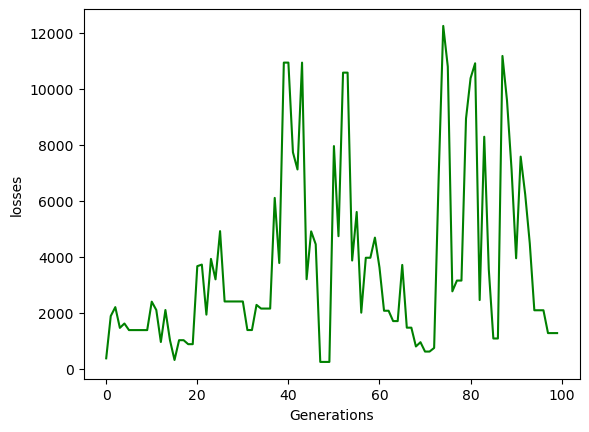

In [46]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
      plt.plot(losses_list, c='green')
      plt.xlabel('Generations')
      plt.ylabel('losses')
      plt.show()

losses_list = run_GA()
visualize_loss(losses_list)

[0.2610190876246845, 0.8161618344459463, -1.0376501497190782, -3.9796827177292893]


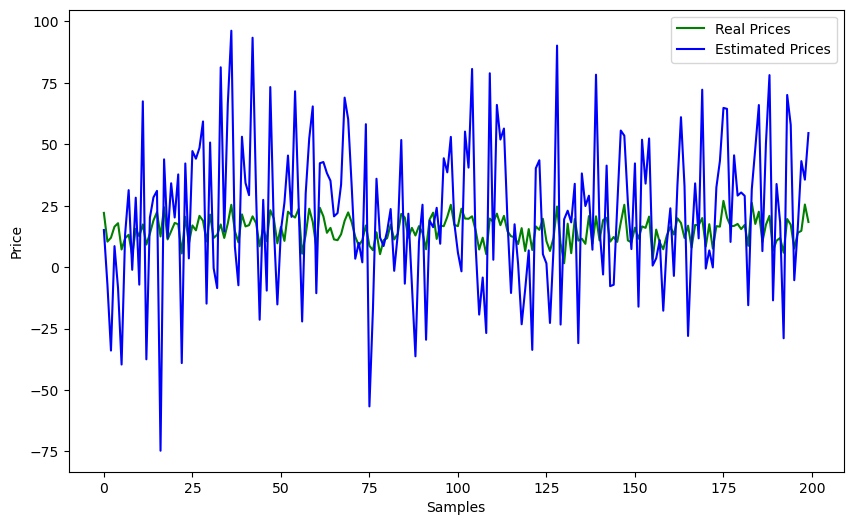

In [48]:
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)


  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()

[0.2610190876246845, 0.8161618344459463, -1.0376501497190782, -3.9796827177292893]


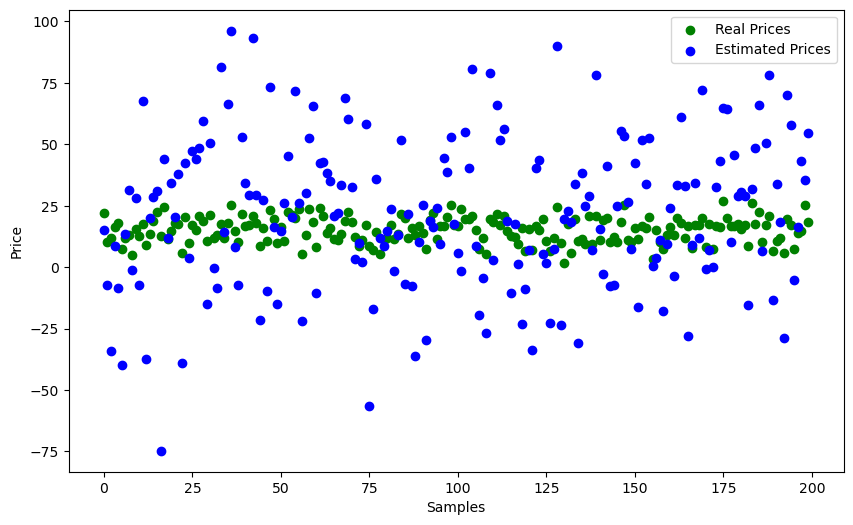

In [49]:
# visualization of ground truth and predict value
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
samples = [i for i in range(len(features_X))]
for feature in features_X:
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
fig, ax = plt.subplots(figsize=(10, 6))
# plt.plot(prices, c='green')
# plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.scatter(samples, sales_Y, c='green', label='Real Prices')
plt.scatter(samples, estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()